 ${\large \text{Investigating the association between 
 air pollutant's concentration and temperature changes}}$ 

${\large \text{1. Introdunction:}} $

 ### Motivation:
 Air pollution has long been recognized as threatening to human health and global warming. Although emissions of most primary pollutants have declined in Europe, North America, and Japan from the 1990s until the present, air pollution is still a serious problem in many places. It is currently considered to be one of the largest environmental issues in the world. My report and my key question are about how the impact of air pollutant concentration is related to weather modification especially temperature changes over 5 years in Ispra, Italy.

  ${\large \text{2. Data Sources:}} $

 For this purpose, in the first research, I found two datasets related to equivalent black carbon and particular matter concentration in 2021. However, these datasets are simple and clean so there is no need to do specific data Transformation methods such as normalizing and removing duplicate rows on them. Thus, Soon, I realized there were not enough suitable as I needed to perform more. Therefore, I decided to expand my timeline into 5 different years from 2018 to 2022.
### Licenses:
   I chose these datasets to have less Nan value in comparison to others also the license is an open data license as well as the publisher is a valid publisher as I am assured of their data quality and data accuracy. (Joint Research Centre and Meteostat service). Equivalent black carbon and particular matter concentration are based on the European Commission reuse notice License and Meteostat data is provided under the terms of the Creative Commons Attribution-NonCommercial 4.0 International Public License (CC BY-NC 4.0). As this report is academic and educational (non-commercial) and I also provide a link to the source datasets, thus I reference the main provider. Moreover, I do not alter any data and any modifications for the purpose of data engineering have been indicated. Therefor, I ensure that this usage of data from the Joint Research Centre and Meteostat service is legally followed and fullfilled their obligations.

### Datasource Description:
In this project, all datasets are structured data in CSV format which has the following data quality dimensions: their accuracy and consistency are not sufficient as their integer range and data type format are not correct in some columns. e.g. black carbon field. All data that I need for analyzing is incompleted such as missing values in Black carbon measurement. Since all these data are historical, the age of data is appropriate so they are Timeliness. In the end, they are relevant and related to the main question. Overall, There are 13 datasetsts in 3 main grosup:

Datasource1:5 datasets for measurements of particle matter number concentration in Ispra, Italy, each of them is for one specific year(2018-2022). I demonstrate links for the year of 2021 as a sample to make it short. These datasets contain Atmospheric Particle numbers which have been calculated based on two methods of DMPS_Total and CPC_Total Particle Concentration in a specific Date and time.
     Metadata URL: http://data.europa.eu/89h/db31c49c-77a8-48df-abc5-aa999ff6494f
     Data URL: "https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/ABCIS/AtmosphericParticles/Ver2021-01-01/DMPS_Particle_Concentration_2021.csv"

Datasource2: 5 datasets for measurements of equivalent black carbon concentration in Ispra, Italy, which each of them is for one specific year(2018-2022). These datasets contain Atmospheric Particles-Equivalent Black Carbon which have been calculated based on Aethalometer in a specific Date and time.
     Metadata URL: http://data.europa.eu/89h/f600d5d9-87b5-44ad-9b33-db45524936ae
     Data URL: "https://cidportal.jrc.ec.europa.eu/ftp/jrc-opendata/ABCIS/AtmosphericParticles/Ver2021-01-01/Equiv_BlackCarbon_AETH_2021.csv"
   

Datasource3: finally, one dataset is for weather changes from 1973 to 2024. For using this data source, I should find the nearest weather station to Ispra based on latitude and longitude, It is Milano Malpensa weather station. This dataset contains The date string in the format of YYYY-MM-DD, The average air temperature in °C, The maximum air temperature in °C, The daily precipitation total, The maximum snow depth in mm, The average wind direction in degrees, The average wind speed in km/h, The peak wind gust in km/h, The average sea-level air pressure in hPa',The daily sunshine total in minutes.]
     Metadata URL: https://dev.meteostat.net/bulk/daily.html
     Data URL: "http://bulk.meteostat.net/v2/daily/16066.csv.gz" #station ID:1606. In addition, There are side data sources essential for understanding the concept of the main dataset. 
Thes documentss typicallyhelpe mappings o column namess to their corresponding meanings in th primaryin data soure
 Data URL: "https://bulk.meteostat.net/v2/stations/full.json.gz" and "https://bulk.meteostat.net/v2/daily/16066.map.csv.gz"s.
6

${\large \text{3. Data Pipeline:}} $

### Method:
There is a pipline shell script in .project/pipeline.sh that creates a new SQLite database from all of these data sources as a standalone file through the ETL process. The requirements are just pandas,t o, andrSQLqlit in Python packages.e3

### Pipeline Structure:
As illustrated in the following diagram, the project follows a structured ETL (Extract, Transform, Load) pipeline approach. All these modules are implemented as functions.

### Extraction:  
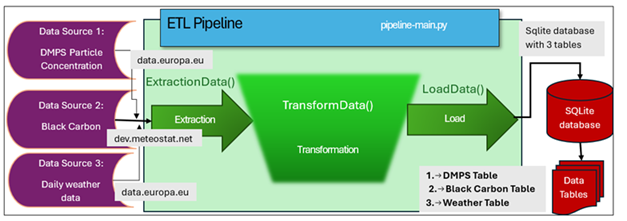

 In this phase, All data sources are obtained from various online sources and implemented as an Extraction function. However, due to differentiation in Date Time, The datasets come from varied sources, accurately, they are in the same areas. Therefore, DPMS and Black Carbon have been appended based on date time respectively. The dataset weather is a GZ file, so it is downloaded and unzipped afterward, it is saved as a CSV file. 

### Transformation:
I separated my transformation process into two parts which worked based on the dataset's URLs. Some of the transformations are shared such as removing duplicated data, counting Nan value then removing Nan columns as most of them are Nan and they will not be useful, renaming all columns in date time format to a unique name like Date that I can merge and manipulate them in the analyzing phase to plot them conveniently. Thus, I put these steps in the main body of the transformation function in order to apply them to the entire data source. Continuously, check the validation of data manually and randomly. Converting Blak carbon data type to integer values as there is no float number for none of them. Converting data type txt to timestamp for data fields, since it provides the calculation of built-in data time functions in the next level. Afterward, specifically for the Weather dataset, due to the lack of headers, I should find its header from metadata information to add it to the data, and after that, I can remove useless columns. Finally, I rectified the scope duration with the help of filtering. Subsequently, these steps perform data frame cleaning and generate a new, refined version. .

### Loads:
The result is to generate the final dataset stored in an SQLite database named "AtmosphericAndTemperatureAnalytics.sqlite" inculding three tables. 


 ### Result and Limitations:
 The final result illustrates the outline of the SQL query from three tables of SQLite database, I utilized SQLite in view of the fact that it is lightweight. There are some missing data for the last month of 2022 for Black carbon measurement. For this issue, I searched more and looked forward to other institutes to provide data but it was not helpful as my project is related to a specific location, therefore it is hard to find data. Generally, data is for big cities or regions. I assume that the measurements have been done precisely as it is provided by valid publisher but always there is a miscalculation. 

As a result, due to enhancements of data quality, the following data quality dimensions are expressed: their accuracy and consistency are sufficient as their integer range and data type format are correct. e.g. the temperature data reflects the real data and it is correct in the format aspect. All data that I need for analyzing is getting completed and they contain all the necessary information. Since all these data are historical, the age of data is appropriate so they are Timeliness. In the end, they are relevant and related to the main question.

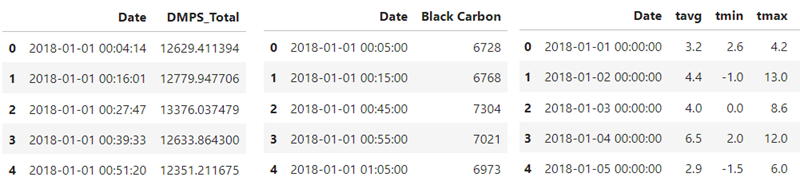